In [1]:
%reload_kedro

2023-10-07 15:21:09,572 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: C:\Users\Dushku\PycharmProjects\monash-datahack-2023
2023-10-07 15:21:09,697 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-10-07 15:21:09,715 - kedro.framework.hooks.manager - INFO - Registered hooks from 1 installed plugin(s): kedro-telemetry-0.2.5
2023-10-07 15:21:09,766 - kedro.extras.extensions.ipython - INFO - ** Kedro project Monash datahack 2023
2023-10-07 15:21:09,766 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\kedro\framework\context\context.py:344: UserWarning: Credentials not found in your Kedro project config.
No files found in ['C:\\Users\\Dushku\\PycharmProjects\\monash-datahack-2023\\conf\\base', 'C:\\Users\\Dushku\\PycharmProjects\\monash-datahack-2023\\conf\\local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  warn(f"Credentials not found in your Kedro project config.\n{str(exc)}")


In [2]:
catalog.list()

['raw_data',
 'preprocessed_data_with_string_values',
 'companies',
 'reviews',
 'shuttles',
 'data_processing.preprocessed_companies',
 'data_processing.preprocessed_shuttles',
 'model_input_table',
 'data_science.active_modelling_pipeline.regressor',
 'data_science.candidate_modelling_pipeline.regressor',
 'parameters',
 'params:data_science',
 'params:data_science.active_modelling_pipeline',
 'params:data_science.active_modelling_pipeline.model_options',
 'params:data_science.active_modelling_pipeline.model_options.test_size',
 'params:data_science.active_modelling_pipeline.model_options.random_state',
 'params:data_science.active_modelling_pipeline.model_options.features',
 'params:data_science.candidate_modelling_pipeline',
 'params:data_science.candidate_modelling_pipeline.model_options',
 'params:data_science.candidate_modelling_pipeline.model_options.test_size',
 'params:data_science.candidate_modelling_pipeline.model_options.random_state',
 'params:data_science.candidate_model

In [3]:
df = catalog.load('preprocessed_data_with_type_classification')

2023-10-07 15:21:09,790 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_data_with_string_values` (CSVDataSet)...


In [4]:
df.head()

,Jurisdiction,Category,Type,Management,Fate,y,ds,Sub-stream
0,ACT,Biosolids,Biosolids,Other disposal,Disposal,20186,2021-12-31,3
1,ACT,Biosolids,Biosolids,Recycling,Recycling,0,2021-12-31,3
2,ACT,Building and demolition materials,Asphalt,Recycling,Recycling,0,2021-12-31,2
3,ACT,Building and demolition materials,Asphalt,Recycling,Recycling,0,2021-12-31,3
4,ACT,Building and demolition materials,Asphalt,Recycling,Recycling,0,2021-12-31,1


In [5]:
df.columns

Index(['Jurisdiction', 'Category', 'Type', 'Management', 'Fate', 'y', 'ds',
       'Sub-stream'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36851 entries, 0 to 36850
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Jurisdiction  36851 non-null  object
 1   Category      36851 non-null  object
 2   Type          36851 non-null  object
 3   Management    36851 non-null  object
 4   Fate          36851 non-null  object
 5   y             36851 non-null  int64 
 6   ds            36851 non-null  object
 7   Sub-stream    36851 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.2+ MB


In [7]:
df['y'] = df['y'].astype(int)

In [8]:
from sklearn.model_selection import train_test_split
from prophet import Prophet

# Define the percentages for the split (e.g., 70% train, 30% test)
train_percentage = 0.7
test_percentage = 0.3

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=test_percentage, random_state=42)

2023-10-07 15:21:10,409 - prophet.plot - ERROR - Importing plotly failed. Interactive plots will not work.


In [9]:
m = Prophet()
m.fit(train_data)

2023-10-07 15:21:10,481 - prophet - INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2023-10-07 15:21:10,482 - prophet - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
15:21:11 - cmdstanpy - INFO - Chain [1] start processing


2023-10-07 15:21:11,165 - cmdstanpy - INFO - Chain [1] start processing


15:21:12 - cmdstanpy - INFO - Chain [1] done processing


2023-10-07 15:21:12,644 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=10, freq='Y')
future.tail()

,ds
20,2027-12-31
21,2028-12-31
22,2029-12-31
23,2030-12-31
24,2031-12-31


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.pr

,ds,yhat,yhat_lower,yhat_upper
20,2027-12-31,7.767418e+05,-1.953402e+06,3.249288e+06
21,2028-12-31,7.034103e+05,-2.003836e+06,3.361957e+06
22,2029-12-31,8.337259e+05,-1.982698e+06,3.433850e+06
23,2030-12-31,9.637453e+05,-1.710327e+06,3.925854e+06
24,2031-12-31,1.093407e+06,-1.625410e+06,4.209506e+06


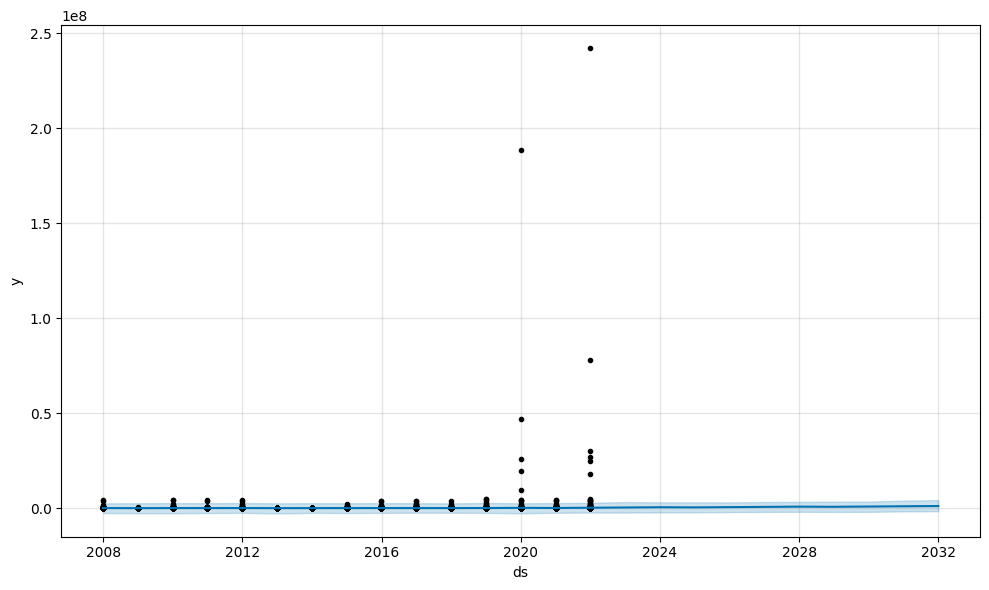

In [12]:
fig1 = m.plot(forecast)

In [13]:
print(future)

           ds
0  2007-12-31
1  2008-12-31
2  2009-12-31
3  2010-12-31
4  2011-12-31
5  2012-12-31
6  2013-12-31
7  2014-12-31
8  2015-12-31
9  2016-12-31
10 2017-12-31
11 2018-12-31
12 2019-12-31
13 2020-12-31
14 2021-12-31
15 2022-12-31
16 2023-12-31
17 2024-12-31
18 2025-12-31
19 2026-12-31
20 2027-12-31
21 2028-12-31
22 2029-12-31
23 2030-12-31
24 2031-12-31


C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


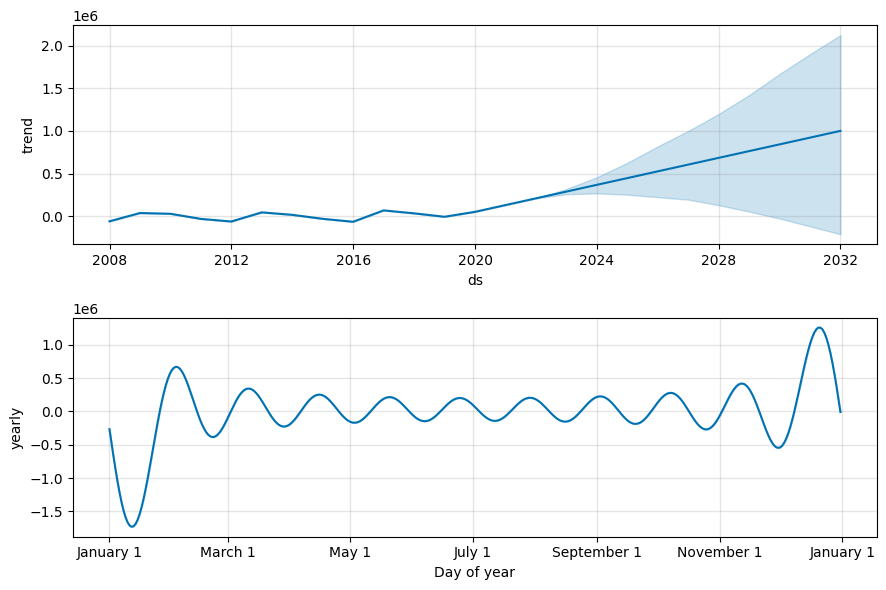

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
from sklearn.preprocessing import LabelEncoder
# Encoding the categorical values
# Initialize the LabelEncoder for each categorical column
label_encoders = {}

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains categorical data
        label_encoders[col] = LabelEncoder()
        df[col + '_encoded'] = label_encoders[col].fit_transform(df[col])
        
df['y'] = LabelEncoder().fit_transform(df['y'])

In [16]:
df.columns

Index(['Jurisdiction', 'Category', 'Type', 'Management', 'Fate', 'y', 'ds',
       'Sub-stream', 'Jurisdiction_encoded', 'Category_encoded',
       'Type_encoded', 'Management_encoded', 'Fate_encoded', 'ds_encoded'],
      dtype='object')

In [17]:
# Selecting feature variables along with the y variable

df = df[['y', 'Jurisdiction_encoded', 'Sub-stream', 'Category_encoded', 'Type_encoded', 'Management_encoded', 'Fate_encoded', 'ds_encoded']]

In [18]:
from sklearn.model_selection import train_test_split

feature_columns = ['ds_encoded', 'Jurisdiction_encoded', 'Category_encoded', 'Type_encoded', 'Management_encoded', 'Fate_encoded', 'Sub-stream']
# Define your target variable (y) and features (X)
# Replace 'target_column' with the name of your target column and 'feature_columns' with the list of feature column names.
y = df['y']
X = df[feature_columns]

# Split the data into training and testing sets
# By default, this code will split 75% for training and 25% for testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Reshaping Y-test two 2-d array
Y_test = Y_test.values.reshape(-1, 1)

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Create Random forest classifer object
Random_forest = RandomForestRegressor(max_depth=2, random_state=0)

# Train Random forest Classifer
Random_forest.fit(X_train,Y_train)

# Predict the response for test dataset
Random_forest_preds = Random_forest.predict(X_test)

C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [20]:
Random_forest.score(X_test, Y_test)

C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


0.19084328672845985

In [21]:
from sklearn.ensemble import AdaBoostRegressor
model_ada = AdaBoostRegressor(learning_rate= 0.002,n_estimators= 205,random_state=42)
model_ada.fit(X_train, Y_train)
pred_ada = model_ada.predict(X_test)
model_ada.score(X_test, Y_test)

C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.

0.24223981605334133

Data outlier analysis
Missing values (heatmap etc
Decision tree
Random forest
Ada boosting
GradientBoostingRegressor
VotingRegressor
XGboost

sklearn grid searching